# Conics programs
The aim of this notebook is to try the methods proposed in the paper "Differentiating Through a Conic Program", to compute derivative of the solution map of convex cone program. 

Using the implementation provided by the authors of the paper, we consider several size of problems to see how computation time evolves with respect to the size of the input.

In [35]:
#!pip install diffcp
#!pip install utils
import time
import diffcp
import numpy as np
from scipy import sparse
import utils
np.set_printoptions(precision=5, suppress=True)


#Redfininf the old version of the function (disappeared from last update)
def random_cone_prog(m, n, cone_dict):
    """Returns the problem data of a random cone program."""
    cone_list = diffcp.cones.parse_cone_dict(cone_dict)
    z = np.random.randn(m)
    s_star = diffcp.cones.pi(z, cone_list, dual=False)
    y_star = s_star - z
    A = sparse.csc_matrix(np.random.randn(m, n))
    x_star = np.random.randn(n)
    b = A @ x_star + s_star
    c = -A.T @ y_star
    return A, b, c

deriv=[]
adjoint=[]
L=[5,10,50,100,200,400, 500,700,900,1000,1500,2000]
a=500
b=a//4
c=a-2*b

for i in range(len(L)) :
    a=L[i]  
    b=a//4
    c=a-2*b
    cone_dict = {
        'z': b,
        'l': b,
        'q': [c]
    }

    m = a
    n = a

    np.random.seed(0)

    A, b, c = random_cone_prog(m, n, cone_dict)

    m, n = A.shape
    x, y, s, D, DT = diffcp.solve_and_derivative(A, b, c, cone_dict)

    # Derivative computation
    debut=time.time()
    nonzeros = A.nonzero()
    data = 1e-4 * np.random.randn(A.size)
    dA = sparse.csc_matrix((data, nonzeros), shape=A.shape)
    db = 1e-4 * np.random.randn(m)
    dc = 1e-4 * np.random.randn(n)
    dx, dy, ds = D(dA, db, dc)
    deriv.append(time.time()-debut)
    #print(dx)

    # evaluate the adjoint of the derivative
    debut=time.time()
    dx = c
    dy = np.zeros(m)
    ds = np.zeros(m)
    dA, db, dc = DT(dx, dy, ds)
    adjoint.append(time.time()-debut)
    #print(dc)

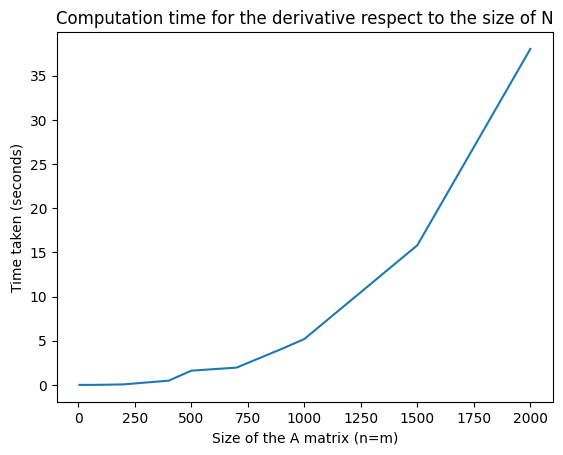

In [39]:
import matplotlib.pyplot as plt 

plt.plot(L,deriv)
plt.title("Computation time for the derivative respect to the size of N")
plt.xlabel("Size of the A matrix (n=m)")
plt.ylabel("Time taken (seconds)")
plt.show()

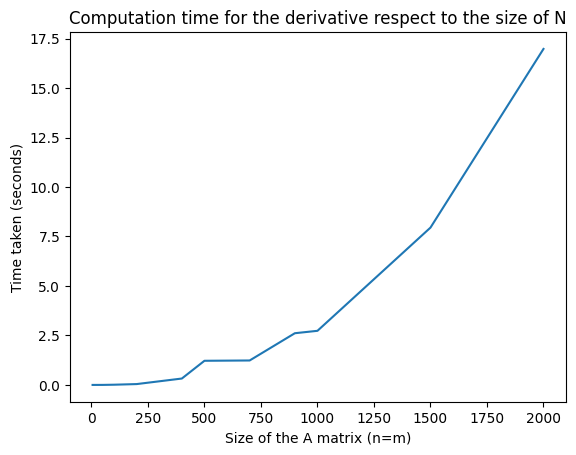

In [38]:
plt.plot(L,adjoint)
plt.title("Computation time for the derivative respect to the size of N")
plt.xlabel("Size of the A matrix (n=m)")
plt.ylabel("Time taken (seconds)")
plt.show()